to_delete = ['osm_amenity_points_in_0.001','osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075','osm_amenity_points_in_0.01', 'osm_building_points_in_0.001','osm_building_points_in_0.005', 'osm_building_points_in_0.0075','osm_building_points_in_0.01', 'osm_catering_points_in_0.001','osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075','osm_catering_points_in_0.01', 'osm_city_closest_dist','osm_city_nearest_name', 'osm_city_nearest_population','osm_crossing_closest_dist', 'osm_crossing_points_in_0.001','osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075','osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001','osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075','osm_culture_points_in_0.01', 'osm_finance_points_in_0.001','osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075','osm_finance_points_in_0.01', 'osm_healthcare_points_in_0.005','osm_healthcare_points_in_0.0075', 'osm_healthcare_points_in_0.01','osm_historic_points_in_0.005', 'osm_historic_points_in_0.0075','osm_historic_points_in_0.01', 'osm_hotels_points_in_0.005','osm_hotels_points_in_0.0075', 'osm_hotels_points_in_0.01','osm_leisure_points_in_0.005', 'osm_leisure_points_in_0.0075','osm_leisure_points_in_0.01', 'osm_offices_points_in_0.001','osm_offices_points_in_0.005', 'osm_offices_points_in_0.0075','osm_offices_points_in_0.01', 'osm_shops_points_in_0.001','osm_shops_points_in_0.005', 'osm_shops_points_in_0.0075','osm_shops_points_in_0.01', 'osm_subway_closest_dist','osm_train_stop_closest_dist', 'osm_train_stop_points_in_0.005','osm_train_stop_points_in_0.0075', 'osm_train_stop_points_in_0.01','osm_transport_stop_closest_dist', 'osm_transport_stop_points_in_0.005','osm_transport_stop_points_in_0.0075','osm_transport_stop_points_in_0.01']

In [411]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [412]:
df = pd.read_csv('./train.csv', sep=',', index_col=False, dtype='unicode')
df.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,0,...,5.762962962962963,5.530612244897959,1964.1185185185184,1960.9591836734687,Пермский край,32.0,S27289,2020-01-05,10,0
1,Шатура,NaN,COL_1,55.574284,39.543835,3,24,37,59,0,...,2.8943661971830985,3.5277777777777777,1952.3216783216785,1957.2222222222226,Московская область,280.0,S17052,2020-01-05,10,0
2,Ярославль,NaN,COL_2,57.61914,39.850525,1,30,67,128,0,...,6.141414141414143,7.222222222222222,1968.15,1973.3703703703704,Ярославская область,297.4,S16913,2020-01-05,110,0
3,Новокузнецк,NaN,COL_3,53.897083,87.108604,0,0,5,21,0,...,8.58108108108108,9.0,1992.7162162162165,2014.0,Кемеровская область,190.0,S10148,2020-01-05,110,0
4,Москва,NaN,COL_4,55.80259,37.48711,1,23,64,153,0,...,7.2638888888888875,5.684210526315789,1963.229166666667,1960.5,Москва,60.2,S1338,2020-01-05,10,0


## План
> 0) убрать строки, где price_type = 0 

причина: "цена из головы" - не были использованы фактические данные для ценообразования -> отрицательно влияет на модель

> 1) убираем nan 
смотрим на распределение столбцов

floor -> заполняем модой по региону

street -> удаялем столбец (никакой важной информации не несет)

остальные -> заполняем средним по региону

> 2) работа с аномальными данными (по всем слобцам)

> 3) комбинируем столбцы osm и reform

> 4) смотрим на корреляцию с таргетом (price_per)

In [413]:
# for column in df.columns:
#     try:
#         df[column] = df[column].astype(str).astype(np.int64)
#     except:
#         continue

df['price_type'] = df['price_type'].astype(np.int64)

In [414]:
# df.dtypes

In [415]:
df.drop(np.where(df['price_type'] == 0)[0], inplace=True)
df.drop(['street', 'lat', 'lng', 'date'], axis=1, inplace=True)
df.head()

,city,floor,id,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,...,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,realty_type,price_type
275299,Красноярск,NaN,COL_62,0,7,14,26,0,0,0,...,2670.0,940.0,7.136842105263157,7.612903225806452,1976.6842105263158,1980.483870967742,Красноярский край,106.3511039591534,110,1
275300,Саратов,NaN,COL_71,13,198,345,462,0,0,0,...,4886.0,943.0,4.144607843137255,4.1645569620253164,1940.5915492957752,1939.3488372093025,Саратовская область,175.0396019779681,10,1
275301,Красноярск,NaN,COL_140,3,15,23,33,0,0,0,...,4282.0,1445.0,6.8514285714285705,5.742424242424242,1976.7142857142856,1972.8787878787882,Красноярский край,89.53492093022255,10,1
275302,Иркутск,NaN,COL_202,0,10,26,40,0,1,1,...,1887.0,612.0,4.597222222222221,5.469387755102041,1968.0981308411206,1975.530612244898,Иркутская область,419.5577516153435,10,1
275303,Белгород,NaN,COL_207,4,48,73,92,0,0,6,...,3837.0,1073.0,9.157480314960633,9.088235294117649,1983.1259842519685,1980.470588235294,Белгородская область,1098.703184907291,10,1


## Пропуски

In [416]:
# прoцент пропуска по столбцам
pd.DataFrame(round(df.isna().sum() / df.shape[0], 4) * 100, columns=['%nan']).loc[df.isna().sum() != 0]

,%nan
floor,54.84
osm_city_nearest_population,0.02
reform_house_population_1000,1.22
reform_house_population_500,1.51
reform_mean_floor_count_1000,1.40
reform_mean_floor_count_500,1.74
reform_mean_year_building_1000,1.36
reform_mean_year_building_500,1.69


In [417]:
df.floor.unique()

array([nan, '2.0', '1', '-1.0', '1.0', '3.0', '18.0', 'подвал, 1', '2',
       '4.0', 'подвал', 'цоколь, 1', '1,2,антресоль', '5.0', '6.0',
       'цоколь', '9.0', '4', '5', 'тех.этаж (6)', '3', 'Подвал', 'Цоколь',
       '10', 'фактически на уровне 1 этажа', '6', '1,2,3', '1, подвал',
       '1,2,3,4', '1,2', '1,2,3,4,5', '5, мансарда', '-2.0', '10.0',
       '1-й, подвал', '12', '15', '13', '1, подвал, антресоль', '16.0',
       'мезонин', 'подвал, 1-3', '8', '7', '15.0', '1 (Цокольный этаж)',
       '3, Мансарда (4 эт)', 'подвал,1', '1, антресоль', '1-3',
       'мансарда (4эт)', '1, 2.', '9', '7.0', 'подвал , 1 ', '1, 2',
       'подвал, 1,2,3', '0.0', '1 + подвал (без отделки)', 'мансарда',
       '2,3', '4, 5', '1-й, 2-й', '18', '1 этаж, подвал', '17.0',
       '1, цоколь', 'подвал, 1-7, техэтаж', '3 (антресоль)', '1, 2, 3',
       'Цоколь, 1,2(мансарда)', 'подвал, 3. 4 этаж', 'подвал, 1-4 этаж',
       'подва, 1.2 этаж', '2, 3', '-1', '1.2', '11', '36', '7,8',
       '1 этаж', '

In [418]:
перед тем как заполнить модой по регионам
распарсим данные насколько это возможно

добавляем столбец, в котором будет храниться количество занимаемых этажей

первый шаг: переводим в инт те этажи, которые выглядят как "3.0",
в количество занимаемых этажей записываем 1
а по остальным записываем их индекс, чтобы работать с ними дальше

df.floor.unique()
df['floors'] = 0


idx_to_fix = []
for floor in df.index:
    try:
        df.loc[floor, 'floor'] = int(df.loc[floor, 'floor'].split('.')[0])
        df.loc[floor, 'floors'] = 1
    except:
        idx_to_fix.append(floor)


# встречаемые символы и слова в строках 
possible_del = ['(', '+', '-', ')']
uniq_ = ['антресоль', 'мансарда', 'мезонин', 'подва', 'подвал', 'тех.этаж', 'техэтаж', 'цоколь', 'цокольный']

# второй шаг: 
for row in idx_to_fix:
    for word in str(df.loc[row, 'floor']).replace(',', ' ').split(' '):
        floors = []
        count = 0
        # print(word)
        try:  
            if '-' in word:
                fl = word.replace('-', ' ').split(' ')
                try:
                    if len(fl) >= 2:
                        for f in range(int(fl[0]), int(fl[1])+1):
                            floors.append(f)
                except IndexError:
                    floors.append(int(fl[0]))
            elif '(' in word:
                fl = word.replace('(', ' ').split(' ')
                floors.append(int(fl[0]))
            else:
                floors.append(int(word))
        except ValueError:
            if word.lower() in uniq_:
                df.loc[row, 'floors'] += 1

        if floors != []:
            df.loc[row, 'floors'] += len(floors)
            df.loc[row, 'floor'] = min(floors)

# третий шаг: 
one_more_go = []
for idx in idx_to_fix:
    try:
        int(df.loc[idx, 'floor'])
    except ValueError:
        one_more_go.append(idx)

for row in one_more_go:
    for word in str(df.loc[row, 'floor']).replace(', ', ' ').split(' '):
        floors = []
        if word.lower().replace('.', '') in uniq_:
            df.loc[row, 'floor'] = 1
        elif '-' in word:
            fl = word.replace('-', ' ').split(' ')
            try:
                if len(fl) >= 2:
                    for f in range(int(fl[0]), int(fl[1])+1):
                        floors.append(f)
            except ValueError:
                floors.append(int(fl[0]))
            df.loc[row, 'floor'] = min(floors)
            df.loc[row, 'floors'] += len(floors)

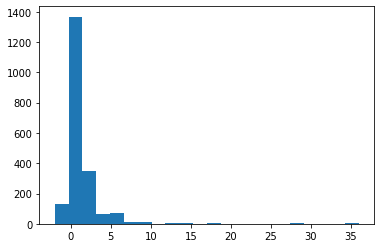

In [419]:
# после того как избавились от строк в столбце floor
# нужно избавляться от пропусков 
# а после этого в столбце floors заменить 0 на 1 

n, bin, patches = plt.hist(df.floor, bins=df.floor.nunique())
plt.show()

In [420]:
floor_mode_by_region = df.groupby(['region']).floor.apply(lambda x: x.mode()).reset_index(0).set_index('region')
for idx in df.loc[df.floor.isna()].index:
    try:
        df.loc[idx, 'floor'] = int(floor_mode_by_region.loc[df.loc[idx, 'region']])
    except:
        df.loc[idx, 'floor'] = int(df.floor.mode())


df.loc[df['floors'] == 0, 'floors'] = 1

In [421]:
df.floors.unique()

array([1, 2, 3, 4, 5, 9, 6])

In [422]:
pd.DataFrame(round(df.isna().sum() / df.shape[0], 4) * 100, columns=['%nan']).loc[df.isna().sum() != 0].index

Index(['osm_city_nearest_population', 'reform_house_population_1000',
       'reform_house_population_500', 'reform_mean_floor_count_1000',
       'reform_mean_floor_count_500', 'reform_mean_year_building_1000',
       'reform_mean_year_building_500'],
      dtype='object')

In [423]:
# диаграммы распределения по столбцам с пропусками

# for col in pd.DataFrame(df.isna().sum(), columns=['%nan']).loc[df.isna().sum() != 0].index:
#     df[col] = df[col].astype(np.float64)
#     n, bin, patches = plt.hist(df[col], bins=df[col].nunique())
#     plt.title(col)
#     plt.show()

In [424]:
for col in pd.DataFrame(df.isna().sum(), columns=['%nan']).loc[df.isna().sum() != 0].index:
    df[col] = df[col].astype(np.float64)

In [425]:
# заполняем пропуски в остальных столбцах 
for col in pd.DataFrame(df.isna().sum(), columns=['%nan']).loc[df.isna().sum() != 0].index:
    for idx in df[np.isnan(df[col])].index:
        df.loc[idx, col] = df.groupby('region')[col].mean()[df.loc[idx, 'region']]

In [426]:
# оставшиеся удаляем 
for col in pd.DataFrame((df.isna().sum() / df.shape[0])*100, columns=['%nan']).loc[df.isna().sum() != 0].index:
    df[col].fillna(df[col].mean(), inplace=True)
    # df.loc[idx, col] = int(df[col].mean())
    # df.dropna(subset=[col], inplace=True)


In [427]:
# пропусков не осталось
pd.DataFrame((df.isna().sum() / df.shape[0])*100, columns=['%nan']).loc[df.isna().sum() != 0]

,%nan


## Аномальные данные

учитывая, что данные от openStreetMap, то вряд ли большие значения или маленькие является аномалиями

<AxesSubplot:xlabel='per_square_meter_price'>

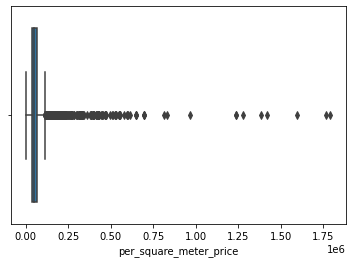

In [428]:
# sns.boxplot(x=df.reform_count_of_houses_1000.astype('str').astype(np.float))
# sns.boxplot(x=df.osm_city_closest_dist.astype('str').astype(np.float))
sns.boxplot(x=df.per_square_meter_price.astype('str').astype(np.float))



In [429]:
corr = pd.DataFrame(columns=['field', 'corrCoef'])
f = []
c = []
for column in df.columns:
    try:
        df[column] = df[column].astype(str).astype(np.float)
        f.append(column)
        c.append(df.per_square_meter_price.corr(df[column]))
    except:
        continue
corr = pd.DataFrame(list(zip(f, c)), columns=['field', 'corrCoef'])
corr.head(None)

# corr.to_csv('my.csv')

,field,corrCoef
0,floor,1.000000
1,osm_amenity_points_in_0.001,0.270262
2,osm_amenity_points_in_0.005,0.185364
3,osm_amenity_points_in_0.0075,0.369232
4,osm_amenity_points_in_0.01,0.265869
5,osm_building_points_in_0.001,-0.013258
6,osm_building_points_in_0.005,-0.008934
7,osm_building_points_in_0.0075,-0.370162
8,osm_building_points_in_0.01,-0.334113
9,osm_catering_points_in_0.001,-0.056878


In [430]:
corr = pd.DataFrame(list(zip(f, c)), columns=['field', 'corrCoef'])
corr.head(None)

,field,corrCoef
0,floor,1.000000
1,osm_amenity_points_in_0.001,0.270262
2,osm_amenity_points_in_0.005,0.185364
3,osm_amenity_points_in_0.0075,0.369232
4,osm_amenity_points_in_0.01,0.265869
5,osm_building_points_in_0.001,-0.013258
6,osm_building_points_in_0.005,-0.008934
7,osm_building_points_in_0.0075,-0.370162
8,osm_building_points_in_0.01,-0.334113
9,osm_catering_points_in_0.001,-0.056878


In [431]:
## ЭТО ВСТАВИТЬ 
df['osm_amenity_points_in_0.005'] = df['osm_amenity_points_in_0.005'].sub(df['osm_amenity_points_in_0.001'], axis=0)
df['osm_amenity_points_in_0.0075'] = df['osm_amenity_points_in_0.0075'].sub(df['osm_amenity_points_in_0.005'], axis=0).sub(df['osm_amenity_points_in_0.001'], axis=0)
df['osm_amenity_points_in_0.01'] = df['osm_amenity_points_in_0.01'].sub(df['osm_amenity_points_in_0.0075'], axis=0).sub(df['osm_amenity_points_in_0.005'], axis=0).sub(df['osm_amenity_points_in_0.001'], axis=0)

df['osm_amenity_points_in_0.001'] = df['osm_amenity_points_in_0.001'] /  (np.pi * pow(100, 2))
df['osm_amenity_points_in_0.005'] = df['osm_amenity_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_amenity_points_in_0.0075'] = df['osm_amenity_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_amenity_points_in_0.01'] = df['osm_amenity_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_amenity_points'] = (df['osm_amenity_points_in_0.001'] + df['osm_amenity_points_in_0.01'] + df['osm_amenity_points_in_0.0075'] + df['osm_amenity_points_in_0.005']) / 4

# ----
df['osm_building_points_in_0.005'] = df['osm_building_points_in_0.005'].sub(df['osm_building_points_in_0.001'], axis=0)
df['osm_building_points_in_0.0075'] = df['osm_building_points_in_0.0075'].sub(df['osm_building_points_in_0.005'], axis=0).sub(df['osm_building_points_in_0.001'], axis=0)
df['osm_building_points_in_0.01'] = df['osm_building_points_in_0.01'].sub(df['osm_building_points_in_0.0075'], axis=0).sub(df['osm_building_points_in_0.005'], axis=0).sub(df['osm_building_points_in_0.001'], axis=0)

df['osm_building_points_in_0.001'] = df['osm_building_points_in_0.001'] /  (np.pi * pow(100, 2))
df['osm_building_points_in_0.005'] = df['osm_building_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_building_points_in_0.0075'] = df['osm_building_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_building_points_in_0.01'] = df['osm_building_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_building_points'] = (df['osm_building_points_in_0.001']+ df['osm_building_points_in_0.005'] + df['osm_building_points_in_0.0075'] + df['osm_building_points_in_0.01']) / 4

# ----

df['osm_crossing_points_in_0.005'] = df['osm_crossing_points_in_0.005'].sub(df['osm_crossing_points_in_0.001'], axis=0)
df['osm_crossing_points_in_0.0075'] = df['osm_crossing_points_in_0.0075'].sub(df['osm_crossing_points_in_0.005'], axis=0).sub(df['osm_crossing_points_in_0.001'], axis=0)
df['osm_crossing_points_in_0.01'] = df['osm_crossing_points_in_0.01'].sub(df['osm_crossing_points_in_0.0075'], axis=0).sub(df['osm_crossing_points_in_0.005'], axis=0).sub(df['osm_crossing_points_in_0.001'], axis=0)

df['osm_crossing_points_in_0.001'] = df['osm_crossing_points_in_0.001'] /  (np.pi * pow(100, 2))
df['osm_crossing_points_in_0.005'] = df['osm_crossing_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_crossing_points_in_0.0075'] = df['osm_crossing_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_crossing_points_in_0.01'] = df['osm_crossing_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_crossing_points'] = (df['osm_crossing_points_in_0.001']+ df['osm_crossing_points_in_0.005'] + df['osm_crossing_points_in_0.0075'] + df['osm_crossing_points_in_0.01']) / 4

#----
df['osm_catering_points_in_0.005'] = df['osm_catering_points_in_0.005'].sub(df['osm_catering_points_in_0.001'], axis=0)
df['osm_catering_points_in_0.0075'] = df['osm_catering_points_in_0.0075'].sub(df['osm_catering_points_in_0.005'], axis=0).sub(df['osm_catering_points_in_0.001'], axis=0)
df['osm_catering_points_in_0.01'] = df['osm_catering_points_in_0.01'].sub(df['osm_catering_points_in_0.0075'], axis=0).sub(df['osm_catering_points_in_0.005'], axis=0).sub(df['osm_catering_points_in_0.001'], axis=0)

df['osm_catering_points_in_0.001'] = df['osm_catering_points_in_0.001'] /  (np.pi * pow(100, 2))
df['osm_catering_points_in_0.005'] = df['osm_catering_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_catering_points_in_0.0075'] = df['osm_catering_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_catering_points_in_0.01'] = df['osm_catering_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_catering_points'] = (df['osm_catering_points_in_0.001']+ df['osm_catering_points_in_0.005'] + df['osm_catering_points_in_0.0075'] + df['osm_catering_points_in_0.01']) / 4


#----
df['osm_culture_points_in_0.005'] = df['osm_culture_points_in_0.005'].sub(df['osm_culture_points_in_0.001'], axis=0)
df['osm_culture_points_in_0.0075'] = df['osm_culture_points_in_0.0075'].sub(df['osm_culture_points_in_0.005'], axis=0).sub(df['osm_culture_points_in_0.001'], axis=0)
df['osm_culture_points_in_0.01'] = df['osm_culture_points_in_0.01'].sub(df['osm_culture_points_in_0.0075'], axis=0).sub(df['osm_culture_points_in_0.005'], axis=0).sub(df['osm_culture_points_in_0.001'], axis=0)

df['osm_culture_points_in_0.001'] = df['osm_culture_points_in_0.001'] /  (np.pi * pow(100, 2))
df['osm_culture_points_in_0.005'] = df['osm_culture_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_culture_points_in_0.0075'] = df['osm_culture_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_culture_points_in_0.01'] = df['osm_culture_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_culture_points'] = (df['osm_culture_points_in_0.001']+ df['osm_culture_points_in_0.005'] + df['osm_culture_points_in_0.0075'] + df['osm_culture_points_in_0.01']) / 4

#----
df['osm_finance_points_in_0.005'] = df['osm_finance_points_in_0.005'].sub(df['osm_finance_points_in_0.001'], axis=0)
df['osm_finance_points_in_0.0075'] = df['osm_finance_points_in_0.0075'].sub(df['osm_finance_points_in_0.005'], axis=0).sub(df['osm_finance_points_in_0.001'], axis=0)
df['osm_finance_points_in_0.01'] = df['osm_finance_points_in_0.01'].sub(df['osm_finance_points_in_0.0075'], axis=0).sub(df['osm_finance_points_in_0.005'], axis=0).sub(df['osm_finance_points_in_0.001'], axis=0)

df['osm_finance_points_in_0.001'] = df['osm_finance_points_in_0.001'] /  (np.pi * pow(100, 2))
df['osm_finance_points_in_0.005'] = df['osm_finance_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_finance_points_in_0.0075'] = df['osm_finance_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_finance_points_in_0.01'] = df['osm_finance_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_finance_points'] = (df['osm_finance_points_in_0.001']+ df['osm_finance_points_in_0.005'] + df['osm_finance_points_in_0.0075'] + df['osm_finance_points_in_0.01']) / 4

#----
df['osm_healthcare_points_in_0.0075'] = df['osm_healthcare_points_in_0.0075'].sub(df['osm_healthcare_points_in_0.005'], axis=0)
df['osm_healthcare_points_in_0.01'] = df['osm_healthcare_points_in_0.01'].sub(df['osm_healthcare_points_in_0.0075'], axis=0).sub(df['osm_healthcare_points_in_0.005'], axis=0)


df['osm_healthcare_points_in_0.005'] = df['osm_healthcare_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_healthcare_points_in_0.0075'] = df['osm_healthcare_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_healthcare_points_in_0.01'] = df['osm_healthcare_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_healthcare_points'] = (df['osm_healthcare_points_in_0.005'] + df['osm_healthcare_points_in_0.0075'] + df['osm_healthcare_points_in_0.01']) / 3

#----
df['osm_historic_points_in_0.0075'] = df['osm_historic_points_in_0.0075'].sub(df['osm_historic_points_in_0.005'], axis=0)
df['osm_historic_points_in_0.01'] = df['osm_historic_points_in_0.01'].sub(df['osm_historic_points_in_0.0075'], axis=0).sub(df['osm_historic_points_in_0.005'], axis=0)

df['osm_historic_points_in_0.005'] = df['osm_historic_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_historic_points_in_0.0075'] = df['osm_historic_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_historic_points_in_0.01'] = df['osm_historic_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_historic_points'] = (df['osm_historic_points_in_0.005'] + df['osm_historic_points_in_0.0075'] + df['osm_historic_points_in_0.01']) / 3

#----
df['osm_hotels_points_in_0.0075'] = df['osm_hotels_points_in_0.0075'].sub(df['osm_hotels_points_in_0.005'], axis=0)
df['osm_hotels_points_in_0.01'] = df['osm_hotels_points_in_0.01'].sub(df['osm_hotels_points_in_0.0075'], axis=0).sub(df['osm_hotels_points_in_0.005'], axis=0)

df['osm_hotels_points_in_0.005'] = df['osm_hotels_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_hotels_points_in_0.0075'] = df['osm_hotels_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_hotels_points_in_0.01'] = df['osm_hotels_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_hotels_points'] = ( df['osm_hotels_points_in_0.005'] + df['osm_hotels_points_in_0.0075'] + df['osm_hotels_points_in_0.01']) / 3

#----
df['osm_leisure_points_in_0.0075'] = df['osm_leisure_points_in_0.0075'].sub(df['osm_leisure_points_in_0.005'], axis=0)
df['osm_leisure_points_in_0.01'] = df['osm_leisure_points_in_0.01'].sub(df['osm_leisure_points_in_0.0075'], axis=0).sub(df['osm_leisure_points_in_0.005'], axis=0)


df['osm_leisure_points_in_0.005'] = df['osm_leisure_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_leisure_points_in_0.0075'] = df['osm_leisure_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_leisure_points_in_0.01'] = df['osm_leisure_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_catering_points'] = (df['osm_catering_points_in_0.005'] + df['osm_catering_points_in_0.0075'] + df['osm_catering_points_in_0.01']) / 3

#----
df['osm_offices_points_in_0.005'] = df['osm_offices_points_in_0.005'].sub(df['osm_offices_points_in_0.001'], axis=0)
df['osm_offices_points_in_0.0075'] = df['osm_offices_points_in_0.0075'].sub(df['osm_offices_points_in_0.005'], axis=0).sub(df['osm_offices_points_in_0.001'], axis=0)
df['osm_offices_points_in_0.01'] = df['osm_offices_points_in_0.01'].sub(df['osm_offices_points_in_0.0075'], axis=0).sub(df['osm_offices_points_in_0.005'], axis=0).sub(df['osm_offices_points_in_0.001'], axis=0)

df['osm_offices_points_in_0.001'] = df['osm_offices_points_in_0.001'] /  (np.pi * pow(100, 2))
df['osm_offices_points_in_0.005'] = df['osm_offices_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_offices_points_in_0.0075'] = df['osm_offices_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_offices_points_in_0.01'] = df['osm_offices_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_offices_points'] = (df['osm_offices_points_in_0.001']+ df['osm_offices_points_in_0.005'] + df['osm_offices_points_in_0.0075'] + df['osm_offices_points_in_0.01']) / 4

#----
df['osm_shops_points_in_0.005'] = df['osm_shops_points_in_0.005'].sub(df['osm_shops_points_in_0.001'], axis=0)
df['osm_shops_points_in_0.0075'] = df['osm_shops_points_in_0.0075'].sub(df['osm_shops_points_in_0.005'], axis=0).sub(df['osm_shops_points_in_0.001'], axis=0)
df['osm_shops_points_in_0.01'] = df['osm_shops_points_in_0.01'].sub(df['osm_shops_points_in_0.0075'], axis=0).sub(df['osm_shops_points_in_0.005'], axis=0).sub(df['osm_shops_points_in_0.001'], axis=0)

df['osm_shops_points_in_0.001'] = df['osm_shops_points_in_0.001'] /  (np.pi * pow(100, 2))
df['osm_shops_points_in_0.005'] = df['osm_shops_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_shops_points_in_0.0075'] = df['osm_shops_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_shops_points_in_0.01'] = df['osm_shops_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_shops_points'] = (df['osm_shops_points_in_0.001']+ df['osm_shops_points_in_0.005'] + df['osm_shops_points_in_0.0075'] + df['osm_shops_points_in_0.01']) / 4

#----
df['osm_train_stop_points_in_0.0075'] = df['osm_train_stop_points_in_0.0075'].sub(df['osm_train_stop_points_in_0.005'], axis=0)
df['osm_train_stop_points_in_0.01'] = df['osm_train_stop_points_in_0.01'].sub(df['osm_train_stop_points_in_0.0075'], axis=0).sub(df['osm_train_stop_points_in_0.005'], axis=0)

df['osm_train_stop_points_in_0.005'] = df['osm_train_stop_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_train_stop_points_in_0.0075'] = df['osm_train_stop_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_train_stop_points_in_0.01'] = df['osm_train_stop_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_train_points'] = (df['osm_train_stop_points_in_0.005'] + df['osm_train_stop_points_in_0.0075'] + df['osm_train_stop_points_in_0.01']) / 3

#----
df['osm_transport_stop_points_in_0.0075'] = df['osm_transport_stop_points_in_0.0075'].sub(df['osm_transport_stop_points_in_0.005'], axis=0)
df['osm_transport_stop_points_in_0.01'] = df['osm_transport_stop_points_in_0.01'].sub(df['osm_transport_stop_points_in_0.0075'], axis=0).sub(df['osm_transport_stop_points_in_0.005'], axis=0)

df['osm_transport_stop_points_in_0.005'] = df['osm_transport_stop_points_in_0.005'] / (np.pi * pow(500, 2))
df['osm_transport_stop_points_in_0.0075'] = df['osm_transport_stop_points_in_0.0075'] / (np.pi * pow(750, 2))
df['osm_transport_stop_points_in_0.01'] = df['osm_transport_stop_points_in_0.01'] / (np.pi * pow(1000, 2))

df['mean_transport_points'] = (df['osm_transport_stop_points_in_0.005'] + df['osm_transport_stop_points_in_0.0075'] + df['osm_transport_stop_points_in_0.01']) / 3

to_delete = ['osm_amenity_points_in_0.001','osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075','osm_amenity_points_in_0.01', 'osm_building_points_in_0.001','osm_building_points_in_0.005', 'osm_building_points_in_0.0075','osm_building_points_in_0.01', 'osm_catering_points_in_0.001','osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075','osm_catering_points_in_0.01', 'osm_city_closest_dist','osm_city_nearest_name', 'osm_city_nearest_population','osm_crossing_closest_dist', 'osm_crossing_points_in_0.001','osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075','osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001','osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075','osm_culture_points_in_0.01', 'osm_finance_points_in_0.001','osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075','osm_finance_points_in_0.01', 'osm_healthcare_points_in_0.005','osm_healthcare_points_in_0.0075', 'osm_healthcare_points_in_0.01','osm_historic_points_in_0.005', 'osm_historic_points_in_0.0075','osm_historic_points_in_0.01', 'osm_hotels_points_in_0.005','osm_hotels_points_in_0.0075', 'osm_hotels_points_in_0.01','osm_leisure_points_in_0.005', 'osm_leisure_points_in_0.0075','osm_leisure_points_in_0.01', 'osm_offices_points_in_0.001','osm_offices_points_in_0.005', 'osm_offices_points_in_0.0075','osm_offices_points_in_0.01', 'osm_shops_points_in_0.001','osm_shops_points_in_0.005', 'osm_shops_points_in_0.0075','osm_shops_points_in_0.01', 'osm_subway_closest_dist','osm_train_stop_closest_dist', 'osm_train_stop_points_in_0.005','osm_train_stop_points_in_0.0075', 'osm_train_stop_points_in_0.01','osm_transport_stop_closest_dist', 'osm_transport_stop_points_in_0.005','osm_transport_stop_points_in_0.0075','osm_transport_stop_points_in_0.01']
df.drop(to_delete, axis=1, inplace=True)
df.drop(['floors', 'price_type'], axis = 1, inplace=True)

In [432]:
# to_delete = ['osm_amenity_points_in_0.001','osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075','osm_amenity_points_in_0.01', 'osm_building_points_in_0.001','osm_building_points_in_0.005', 'osm_building_points_in_0.0075','osm_building_points_in_0.01', 'osm_catering_points_in_0.001','osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075','osm_catering_points_in_0.01', 'osm_city_closest_dist','osm_city_nearest_name', 'osm_city_nearest_population','osm_crossing_closest_dist', 'osm_crossing_points_in_0.001','osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075','osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001','osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075','osm_culture_points_in_0.01', 'osm_finance_points_in_0.001','osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075','osm_finance_points_in_0.01', 'osm_healthcare_points_in_0.005','osm_healthcare_points_in_0.0075', 'osm_healthcare_points_in_0.01','osm_historic_points_in_0.005', 'osm_historic_points_in_0.0075','osm_historic_points_in_0.01', 'osm_hotels_points_in_0.005','osm_hotels_points_in_0.0075', 'osm_hotels_points_in_0.01','osm_leisure_points_in_0.005', 'osm_leisure_points_in_0.0075','osm_leisure_points_in_0.01', 'osm_offices_points_in_0.001','osm_offices_points_in_0.005', 'osm_offices_points_in_0.0075','osm_offices_points_in_0.01', 'osm_shops_points_in_0.001','osm_shops_points_in_0.005', 'osm_shops_points_in_0.0075','osm_shops_points_in_0.01', 'osm_subway_closest_dist','osm_train_stop_closest_dist', 'osm_train_stop_points_in_0.005','osm_train_stop_points_in_0.0075', 'osm_train_stop_points_in_0.01','osm_transport_stop_closest_dist', 'osm_transport_stop_points_in_0.005','osm_transport_stop_points_in_0.0075','osm_transport_stop_points_in_0.01']
# df.drop(to_delete, axis=1, inplace=True)
# df.drop(['floors', 'price_type'], axis = 1, inplace=True)


In [434]:
corr = pd.DataFrame(columns=['field', 'corrCoef'])
f = []
c = []
for column in df.columns:
    try:
        df[column] = df[column].astype(str).astype(np.float)
        f.append(column)
        c.append(df.per_square_meter_price.corr(df[column]))
    except:
        continue
corr = pd.DataFrame(list(zip(f, c)), columns=['field', 'corrCoef'])
corr.head(None)
corr.to_csv('my.csv')